In [1]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import astropy.constants as c
from astropy.units import Quantity
import astropy.units as u

from gala.potential import PlummerPotential
from gala.units import galactic

In [2]:
m0 = 4e10
a = 1.6
pot = PlummerPotential(m0 * u.Msun, a*u.kpc, units=galactic)

_g = c.G.to(u.kpc**3 / u.Gyr**2 / u.Msun).value

def plummer_potential(q, m0, a):
    return -_g * m0 / jnp.sqrt(q[0]**2 + q[1]**2 + q[2]**2 + a**2)

In [3]:
hess = jax.hessian(plummer_potential, argnums=0)

In [4]:
r = jnp.logspace(-3, 3, 100)

In [5]:

gh = pot.hessian(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)])).to(u.Gyr**(-2)).value.T
mh = jnp.array([hess(jnp.array([r_i, 0, 0]), 4e10, 1.6) for r_i in r])

g_tt = jnp.array([-(1/3)*jnp.trace(gh_i) * jnp.identity(3) + gh_i for gh_i in gh])
m_tt = jnp.array([-(1/3)*jnp.trace(mh_i) * jnp.identity(3) + mh_i for mh_i in mh])

In [6]:
np.isclose(g_tt, m_tt, atol=1e-2).all()

True

In [7]:
g_lam = np.max(np.abs(np.linalg.eig(g_tt)[0]), axis=1)
m_lam = np.max(np.abs(np.linalg.eig(m_tt)[0]), axis=1)

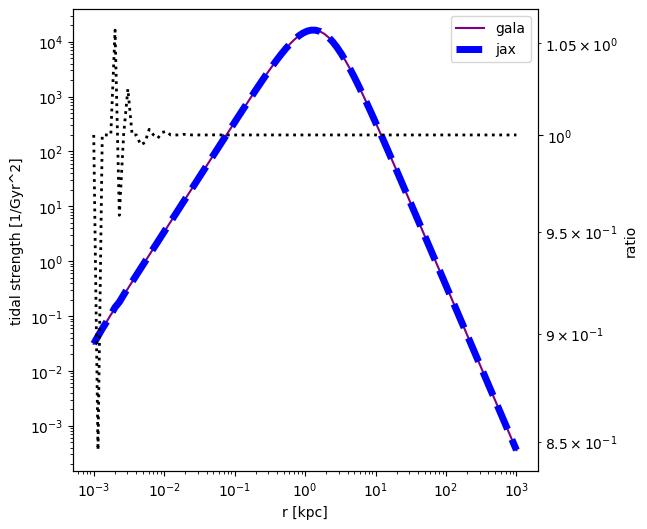

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.loglog(r, g_lam, c='purple', label='gala')
ax.loglog(r, m_lam, c='blue', ls='--', lw=5, label='jax')
# axis for ratio residual
ax2 = ax.twinx()
ax2.loglog(r, m_lam / g_lam, c='black', ls=':', lw=2, label='ratio')
ax2.set_ylabel('ratio')

ax.set_xlabel('r [kpc]')
ax.set_ylabel('tidal strength [1/Gyr^2]')
ax.legend()
)
plt.show()

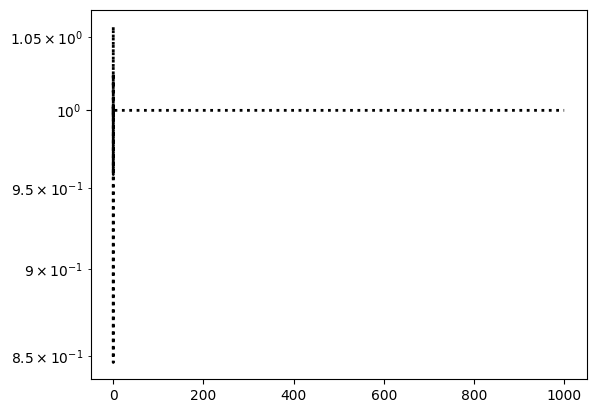

In [9]:
plt.semilogy(r, m_lam / g_lam, c='black', ls=':', lw=2, label='ratio')